In [1]:
import numpy as np
import matplotlib.pyplot as plt

### **Ejercicio 7**: Valores Singulares

Considerar la matriz:

$$
A = \begin{pmatrix} 4 & 0 \\ 3 & 5 \end{pmatrix}
$$

**(a)** Calcular una descomposición en valores singulares de $ A $. -> Hecho en papel

**(b)** Dibujar el círculo unitario en $ \mathbb{R}^2 $ y la elipse $ \{Ax : x \in \mathbb{R}^2, \|x\|_2 = 1\} $, señalando los valores singulares y los vectores singulares a izquierda y a derecha.


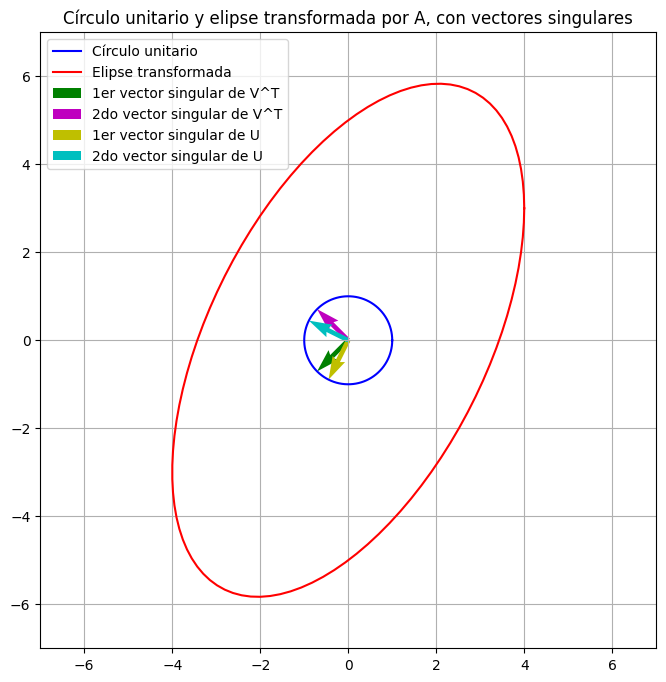

In [2]:
# Para visualizar el círculo unitario y la elipse transformada por A, usando los vectores y valores singulares.

# Definimos la matriz A dada
A = np.array([[4, 0],
              [3, 5]])

# Definimos los valores singulares de la matriz A (diagonal de Sigma)
singular_values = np.linalg.svd(A, compute_uv=False)

# Los vectores singulares de la izquierda (U) y derecha (V^T) están dados por la descomposición en SVD
U, Sigma, Vt = np.linalg.svd(A)

# Crear puntos para el círculo unitario
t = np.linspace(0, 2 * np.pi, 100)
x = np.cos(t)
y = np.sin(t)
circulo_unitario = np.vstack([x, y])

# Aplicar la transformación de A al círculo unitario para obtener la elipse
elipse_transformada = A @ circulo_unitario

# Visualización
fig, ax = plt.subplots(figsize=(12,8))

# Graficar el círculo unitario
ax.plot(circulo_unitario[0, :], circulo_unitario[1, :], 'b', label='Círculo unitario')

# Graficar la elipse transformada
ax.plot(elipse_transformada[0, :], elipse_transformada[1, :], 'r', label='Elipse transformada')

# Añadir los vectores singulares de V^T
ax.quiver(0, 0, Vt[0, 0], Vt[0, 1], angles='xy', scale_units='xy', scale=1, color='g', label='1er vector singular de V^T')
ax.quiver(0, 0, Vt[1, 0], Vt[1, 1], angles='xy', scale_units='xy', scale=1, color='m', label='2do vector singular de V^T')

# Añadir los vectores singulares de U
ax.quiver(0, 0, U[0, 0], U[0, 1], angles='xy', scale_units='xy', scale=1, color='y', label='1er vector singular de U')
ax.quiver(0, 0, U[1, 0], U[1, 1], angles='xy', scale_units='xy', scale=1, color='c', label='2do vector singular de U')

# Ajustar límites y leyenda
ax.set_aspect('equal', adjustable='box')
ax.grid(True)
ax.set_xlim([-7, 7])
ax.set_ylim([-7, 7])
ax.legend()

# Título y mostrar gráfico
plt.title("Círculo unitario y elipse transformada por A, con vectores singulares")
plt.show()


In [3]:
print('Valores singulares:', singular_values)

Valores singulares: [6.32455532 3.16227766]


In [28]:
# Calculamos norma 2 de A
norma_2 = np.linalg.norm(A, ord=2)
print(f"La norma 2 de A es: {norma_2}")
A_inv = np.linalg.inv(A)
norma_2_inv = np.linalg.norm(A_inv, ord=2)
print(f"La norma 2 de la inversa de A es: {norma_2_inv}")

# Calculamos condición de A
np.linalg.cond(A, p=2)

La norma 2 de A es: 6.324555320336759
La norma 2 de la inversa de A es: 0.31622776601683805


np.float64(2.0000000000000004)

<h2 align="center"> Compresión de Imágen </h2>

El resultado del ejercicio 14 se puede aprovechar para comprimir imágenes. 

La idea es la siguiente: dada una imagen (en principio, en blanco y negro), se puede representar a través de una matriz en la que cada elemento indica la intensidad de color del pixel. El objetivo de los siguientes ejercicios es estudiar esta aplicación.



### ***Ejercicio 19.*** Descargar la imagen *quijote.jpg* y utilizar el comando **imread** de la librería `matplotlib.pyplot` para cargarla. Imprimir el resultado. Mostrar la imagen utilizando el comando **imshow**. Probablemente, la gama de colores por defecto no sea en blanco y negro. Ejecutar el comando: `from matplotlib import cm` y volver a correr **imshow**, esta vez con la opción `cmap="gray"`. (Buscando matplotlib colormap se encuentran fácilmente distintos mapas de colores para graficar).

### **Ejercicio 20**. 

Escribir un programa que reciba como input una matriz $\boldsymbol{A} \in \mathbb{R}^{n \times m}$ y un entero positivo $r$ y:
- Calcule la descomposición en valores singulares $\boldsymbol{A}$, utilizando el comando np. linalg.svd o el comando scipy.linalg.svd. Ambos comandos devuelven $\boldsymbol{U} \in \mathbb{R}^{n \times n}, \boldsymbol{V} \in \mathbb{R}^{m \times m}$ y $\boldsymbol{s} \in \mathbb{R}^{\min \{n, m\}}$, de manera tal que $\boldsymbol{A}=\boldsymbol{U} \operatorname{diag}(s) \boldsymbol{V}$.
- Devuelva: una tupla con la dimensión original de la matriz $\boldsymbol{A}(n, m)$, las matrices $\tilde{\boldsymbol{U}} \in \mathbb{R}^{n \times r}$ y $\tilde{\boldsymbol{V}} \in \mathbb{R}^{r \times m}$ que surgen de eliminar de $\boldsymbol{U}$ y $\boldsymbol{V}$ los vectores singulares con índice mayor a $r$ y el vector de valores singulares $\tilde{s} \in \mathbb{R}^r$, también recortado.

### **Ejercicio 21.** 



Escribir un programa que recontruya la matriz a partir del output del programa anterior. Es decir, que:
- Reciba el tamaño $(n, m)$, las matrices $\tilde{\boldsymbol{U}}$ y $\tilde{\boldsymbol{V}}$ el vector $\tilde{\boldsymbol{s}}$.
- Amplie las matrices con ceros generando $\boldsymbol{U}^{\prime} \in \mathbb{R}^{n \times n}, \boldsymbol{V}^{\prime} \in \mathbb{R}^{m \times m} ;$ y ponga $\tilde{\boldsymbol{s}}$ en la diagonal de una matriz $\boldsymbol{\Sigma}^{\prime} \in \mathbb{R}^{n \times m}$.
- Devuelva la matriz $\boldsymbol{B}=\boldsymbol{U}^{\prime} \boldsymbol{\Sigma}^{\prime} \boldsymbol{V}^{\prime}$ (que es la mejor aproximación a $\boldsymbol{A}$ entre las matrices de rango $r$ ).